In [3]:
%load_ext autoreload

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', None)

In [5]:
%autoreload
from pipeline import Pipeline, BuilingIdsEnum
from utils import plot_energy_usage, ColumnParam
pipe = Pipeline()

In [6]:
main_df = pipe.get_data(BuilingIdsEnum.MAIN)
print("columns:", list(main_df.columns))

columns: ['timestamp', 'value_import', 'value_export', 'solar_consumption', 'net_consumption', 'net_consumption_per_sqm', 'predicted_consumption', 'building', 'property_id', 'area', 'temperature', 'wind_speed', 'wind_direction', 'cloud_fraction', 'precipitation']


In [9]:
A_df = pipe.get_data(BuilingIdsEnum.A)
B_df = pipe.get_data(BuilingIdsEnum.B)
C_df = pipe.get_data(BuilingIdsEnum.C)
print("columns:", list(A_df.columns))

columns: ['timestamp', 'value_import', 'net_consumption', 'net_consumption_per_sqm', 'building', 'property_id', 'area', 'temperature', 'wind_speed', 'wind_direction', 'cloud_fraction', 'precipitation']


Main Building:  267.2022185154295 kwH/m^2
Building A:  295.8871122536418 kwH/m^2
Building B:  267.14226484018263 kwH/m^2
Building C:  322.2646604046243 kwH/m^2


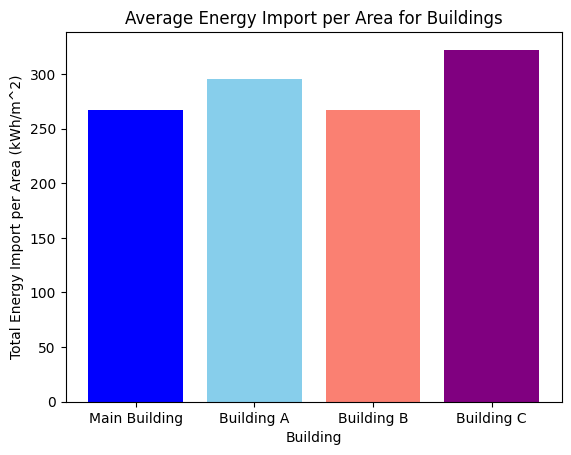

In [17]:
sum_main = (main_df['value_import'].sum() - main_df['value_export'].sum())/main_df['area'][0] #Net Import per sqm
sum_A = A_df['net_consumption_per_sqm'].sum()
sum_B = B_df['net_consumption_per_sqm'].sum()
sum_C = C_df['net_consumption_per_sqm'].sum()

print ("Main Building: ", sum_main, "kwH/m^2")
print ("Building A: ", sum_A, "kwH/m^2")
print ("Building B: ", sum_B, "kwH/m^2")
print ("Building C: ", sum_C, "kwH/m^2")

plt.bar(['Main Building', 'Building A', 'Building B', 'Building C'], [sum_main, sum_A, sum_B, sum_C], color=['blue', 'skyblue', 'salmon', 'purple'])
plt.title('Average Energy Import per Area for Buildings')
plt.ylabel('Total Energy Import per Area (kWh/m^2)')
plt.xlabel('Building')
plt.show()

The percentage change in total consumption is:  -11.3804206910854


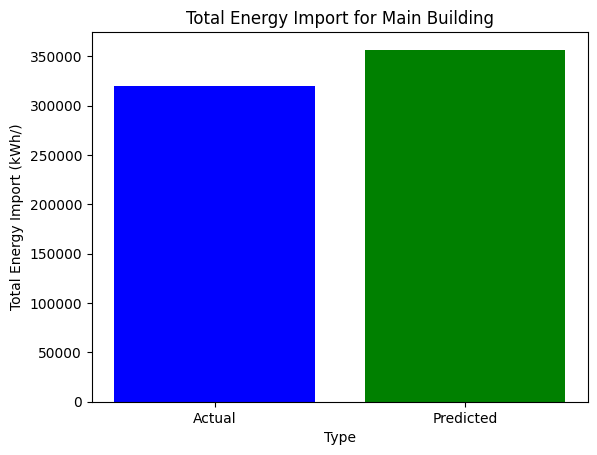

In [ ]:
actual_sum = main_df['value_import'].sum() - main_df['value_export'].sum()
predicted_sum = main_df['predicted_consumption'].sum()

percentage_change = (actual_sum - predicted_sum) / actual_sum * 100
print("The percentage change in total consumption is: ", percentage_change)

plt.bar(['Actual', 'Predicted'], [actual_sum, predicted_sum], color=['blue', 'green'])
plt.title('Predicted vs Actual Total Energy Import for Main Building')
plt.ylabel('Energy Consumption (kWh)')
plt.xlabel('Type')
plt.show()